### Namibian power network generated from PyPSA-Earth-Sec - an open energy system optimization model

scenario configuration options : optimistic, realistic, conservative

References : 

For more information on the model, refer to the following sources.

[pypsa-earth-sec](https://github.com/pypsa-meets-earth/pypsa-earth-sec) on GitHub.

check [documentation](https://github.com/pypsa-meets-earth/documentation) for [pypsa-earth](https://github.com/pypsa-meets-earth/pypsa-earth) relation information.

see [pypsa-meets-earth](https://github.com/pypsa-meets-earth), 2023) project on GitHub. 

In [3]:
%run -i ../functions/load_packages.ipynb
%run -i ../functions/helper_functions.ipynb

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
plt.rcParams["figure.dpi"] = 300

### Setup network files and relevant technologies for 2030

In [4]:
res_techs = [
        "csp",
        "rooftop-solar",
        "solar",
        "onwind",
        "onwind2",
        "offwind",
        "offwind2",
        "ror",
    ]
scen_dict = {'Realistic 0':{
                      'run': 'MT_real30', 'cluster': '30', 'ir': '0.082', 'ds':'AP', 'l':'0'
                  },
              'Realistic 750':{
                      'run': 'MT_real30_750', 'cluster': '30', 'ir': '0.082', 'ds':'AP', 'l':'750'
              },
            'Realistic 1500':{
                      'run': 'MT_real30_1500', 'cluster': '30', 'ir': '0.082', 'ds':'AP', 'l':'1500'
            },
            'Realistic 2250':{
                      'run': 'MT_real30_2250', 'cluster': '30', 'ir': '0.082', 'ds':'AP', 'l':'2250'
            }
}
pes_dir = "../../sandbox-cs/pypsa-earth-sec"
Q30 = [ "0",
        "1",
        "5",
        "50",
        "100",
        "200"
    ]
timestep = "3"

/tmp/ipykernel_1446600/2684269714.py:24: RuntimeWarning: invalid value encountered in double_scalars
  li.append(((df.loc["total costs",column].astype(float)- df.loc["total costs", "0"].astype(float)) / (df.loc["export", column] * (1e+09/33.33))).round(2))
/tmp/ipykernel_1446600/2684269714.py:24: RuntimeWarning: invalid value encountered in double_scalars
  li.append(((df.loc["total costs",column].astype(float)- df.loc["total costs", "0"].astype(float)) / (df.loc["export", column] * (1e+09/33.33))).round(2))
/tmp/ipykernel_1446600/2684269714.py:24: RuntimeWarning: invalid value encountered in double_scalars
  li.append(((df.loc["total costs",column].astype(float)- df.loc["total costs", "0"].astype(float)) / (df.loc["export", column] * (1e+09/33.33))).round(2))
/tmp/ipykernel_1446600/2684269714.py:24: RuntimeWarning: invalid value encountered in double_scalars
  li.append(((df.loc["total costs",column].astype(float)- df.loc["total costs", "0"].astype(float)) / (df.loc["export", column] 

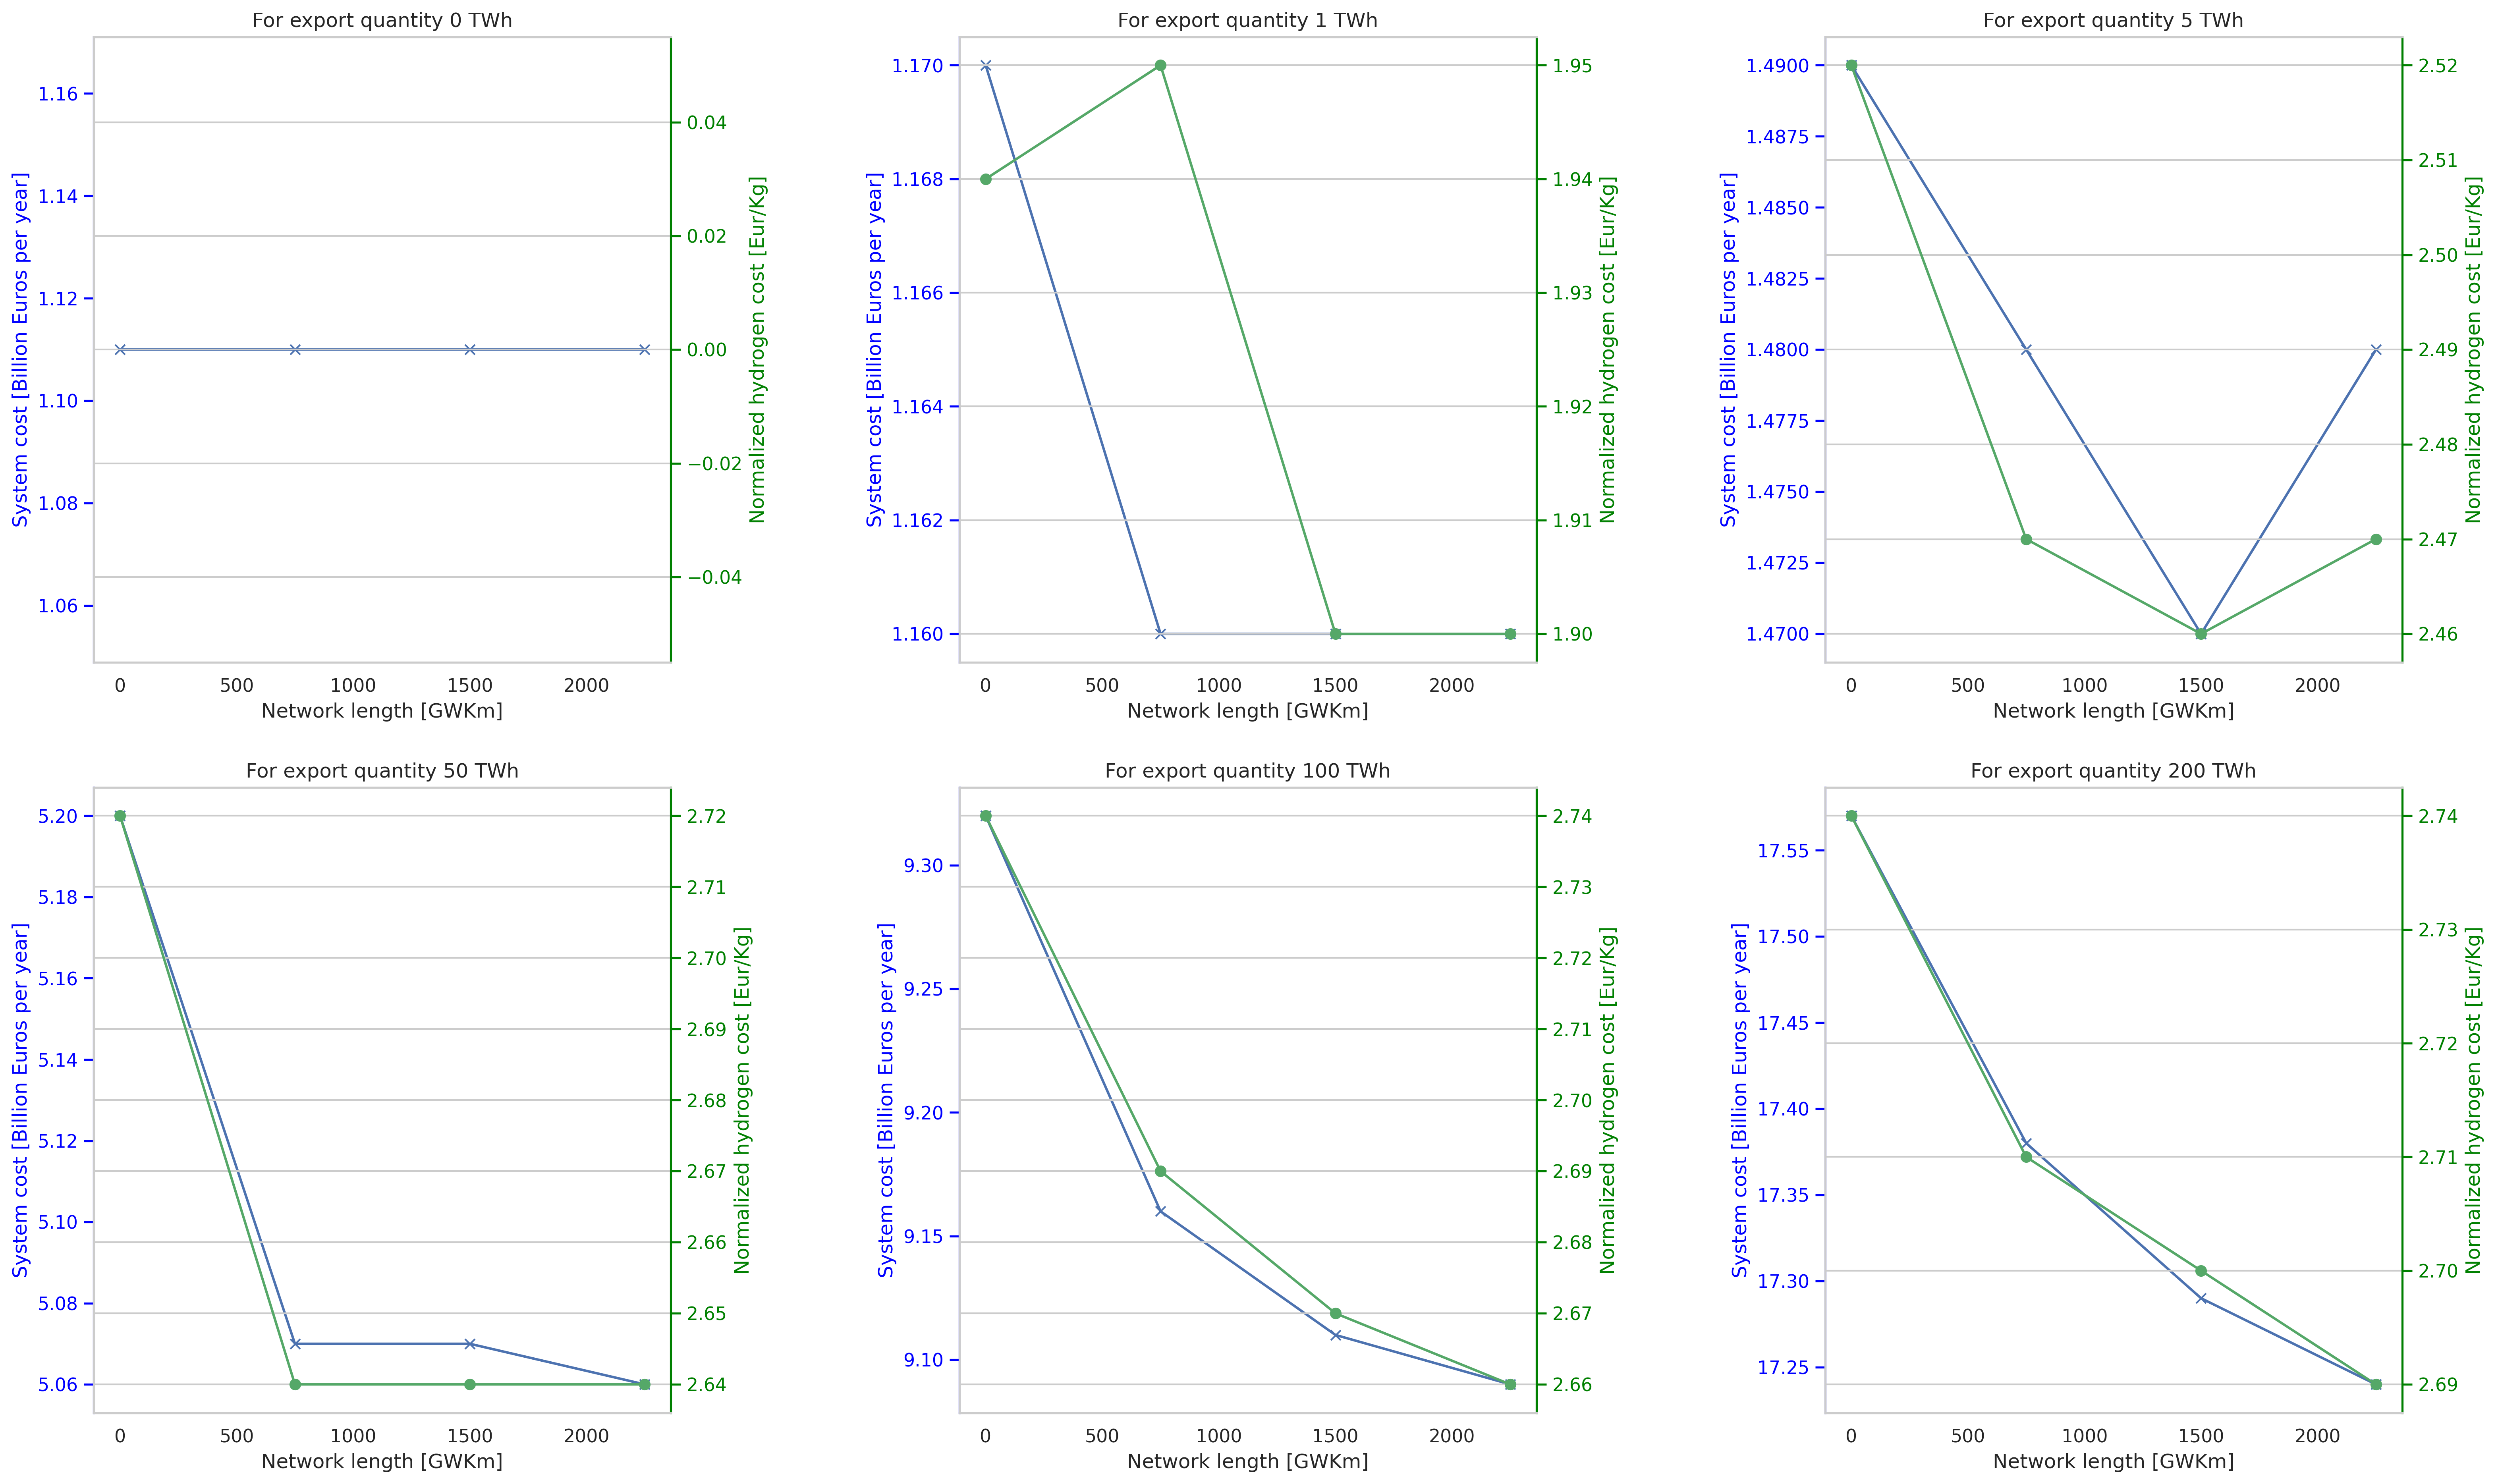

In [5]:
def sa_cost_h2(scen_dict,pes_dir):
    fig, axs = plt.subplots(2,3, figsize=(25, 15), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0.2, wspace=.5)
    #fig, ax = plt.subplots(figsize=(3, 3))
    dft=pd.DataFrame()
    for ax,q in zip(axs.ravel(),Q30):
        dfc=pd.DataFrame()
        for pathway in scen_dict.keys():
            dftemp=pd.DataFrame()
            li = []
            scenario = scen_dict[pathway]
            metrics = pes_dir+"/results/{}/csvs/metrics.csv".format(scenario["run"])
            df = pd.read_csv(metrics, keep_default_na=False,
                    na_values=[""], index_col="cluster")
            #df=df.set_index('cluster')
            df = df.loc[["export","total costs"]]
            df = df.rename(columns=df.iloc[0])
            #df = df.drop("export")
            df = df.apply(pd.to_numeric)
            for column in df.columns[0:]:
                if column == q:
                    li.append(float(scenario["l"]))
                    li.append((df.loc["total costs",column]*1e-9).round(2))
                    li.append(((df.loc["total costs",column].astype(float)- df.loc["total costs", "0"].astype(float)) / (df.loc["export", column] * (1e+09/33.33))).round(2))
                    #print(df.loc["total costs",column])
            dftemp= pd.DataFrame(li)
            dfc = pd.concat([dfc, dftemp], axis=1)
        dft=pd.concat([dft,dfc], axis=1) 
        dfc=dfc.T
        dfc = dfc.set_index(0)
        #print(dfc)
        dfc.plot(ax=ax,grid=False, y=1, marker="x",xlabel="Network length [GWKm]", 
            ylabel= "System cost [Billion Euros per year]",  legend=False)
        ax1=ax.twinx()
        dfc.plot(ax=ax1, y=2, marker="o",color='g',ylabel= "Normalized hydrogen cost [Eur/Kg]", legend=False)
        ax.set_title("For export quantity {} TWh".format(str(q)))
        
        ax1.yaxis.label.set_color('green')        
        ax.yaxis.label.set_color('blue')         
        
        ax1.tick_params(axis='y', colors='green')    
        ax.tick_params(axis='y', colors='blue') 

        ax1.spines['right'].set_color('green')      
        ax.spines['left'].set_color('blue')         
        #dfc = pd.concat([dfc, dftemp2],axis=1)
        #
        #dfc = pd.concat[dfc, dftemp]
        #     df=df.set_index('cluster')
        #     df = df.loc[['export', 'total costs']]
        #     df = df.apply(pd.to_numeric)
        #     #df.columns = ["0","1","5","50", "100", "200"]
        #     #print(df)
        #     dfc = [0]
        #     for column in df.columns[1:]:
        #         dfc.append(((df.loc["total costs",column].astype(float)- df.loc["total costs", "{}".format(scenario["cluster"])].astype(float)) / (df.loc["export", column] * (1e+09/33.33))).round(2))
        #     dfc = pd.DataFrame(dfc).transpose()
        #     dfc.columns = ["{}".format(scenario["cluster"]), "{}.1".format(scenario["cluster"]), "{}.2".format(scenario["cluster"]), "{}.3".format(scenario["cluster"]), "{}.4".format(scenario["cluster"]), "{}.5".format(scenario["cluster"])]
        #     dfopt = pd.concat([df, dfc], axis=0)
        #     dfopt.T.plot(ax=ax, x='export', y=0, grid=True, marker="x")
        #     li.append(pathway)
        #     out = pd.DataFrame(dfc)
        # ax.legend(li);
        # #ax.legend(["Realistic 2030", "Conservative 2030"]);
        # ax.set_ylabel('Hydrogen normalized cost (€/kg)',fontsize=12)
        # ax.set_xlabel('Export quantity (TWh)',fontsize=12)
        # ax.set_xlim(1,250)
        # ax.set_ylim(1,3.5)
        # ax.set_title('Normalized cost of green hydrogen at the export locations')
    return dft
dfg= sa_cost_h2(scen_dict,pes_dir)

In [6]:
dft=pd.DataFrame()
for q in Q30:
    dfc=pd.DataFrame()
    for pathway in scen_dict.keys():
        dftemp=pd.DataFrame()
        li = []
        scenario = scen_dict[pathway]
        metrics = pes_dir+"/results/{}/csvs/metrics.csv".format(scenario["run"])
        df = pd.read_csv(metrics, keep_default_na=False,
                na_values=[""], index_col="cluster")
        #df=df.set_index('cluster')
        df = df.loc[["export","total costs"]]
        df = df.rename(columns=df.iloc[0])
        df = df.drop("export")
        df = df.apply(pd.to_numeric)
        for column in df.columns[0:]:
            if column == q:
                #li.append(float(scenario["l"]))
                li.append((df.loc["total costs",column]*1e-9).round(2))
                #print(df.loc["total costs",column])
        dftemp= pd.DataFrame(li)
        dftemp.columns=[scenario["l"]]
        dfc = pd.concat([dfc, dftemp], axis=1)
    #print(dfc)
    dft=pd.concat([dft,dfc], axis=0)
dft.index = [0,1,5,50,100,200]
dft

,0,750,1500,2250
0,1.11,1.11,1.11,1.11
1,1.17,1.16,1.16,1.16
5,1.49,1.48,1.47,1.48
50,5.20,5.07,5.07,5.06
100,9.32,9.16,9.11,9.09
200,17.57,17.38,17.29,17.24


In [7]:
dft=pd.DataFrame()
for q in Q30:
    dfc=pd.DataFrame()
    for pathway in scen_dict.keys():
        dftemp=pd.DataFrame()
        li = []
        scenario = scen_dict[pathway]
        metrics = pes_dir+"/results/{}/csvs/metrics.csv".format(scenario["run"])
        df = pd.read_csv(metrics, keep_default_na=False,
                na_values=[""], index_col="cluster")
        #df=df.set_index('cluster')
        df = df.loc[["export","total costs"]]
        df = df.rename(columns=df.iloc[0])
        #df = df.drop("export")
        df = df.apply(pd.to_numeric)
        for column in df.columns[1:]:
            if column == q:
                #li.append(float(scenario["l"]))
                li.append(((df.loc["total costs",column].astype(float)- df.loc["total costs", "0"].astype(float)) / (df.loc["export", column] * (1e+09/33.33))).round(2))
                #li.append((df.loc["total costs",column]*1e-9).round(2))
                #print(df.loc["total costs",column])
        dftemp= pd.DataFrame(li)
        #dftemp.columns=[scenario["l"]]
        dfc = pd.concat([dfc, dftemp], axis=1)
    #print(dfc)
    dft=pd.concat([dft,dfc], axis=0)
dft.index = [1,5,50,100,200]
dft.columns = [0, 750, 1500, 2250]
dft

,0,750,1500,2250
1,1.94,1.95,1.90,1.90
5,2.52,2.47,2.46,2.47
50,2.72,2.64,2.64,2.64
100,2.74,2.69,2.67,2.66
200,2.74,2.71,2.70,2.69


### Normalized cost of hydrogen at export location

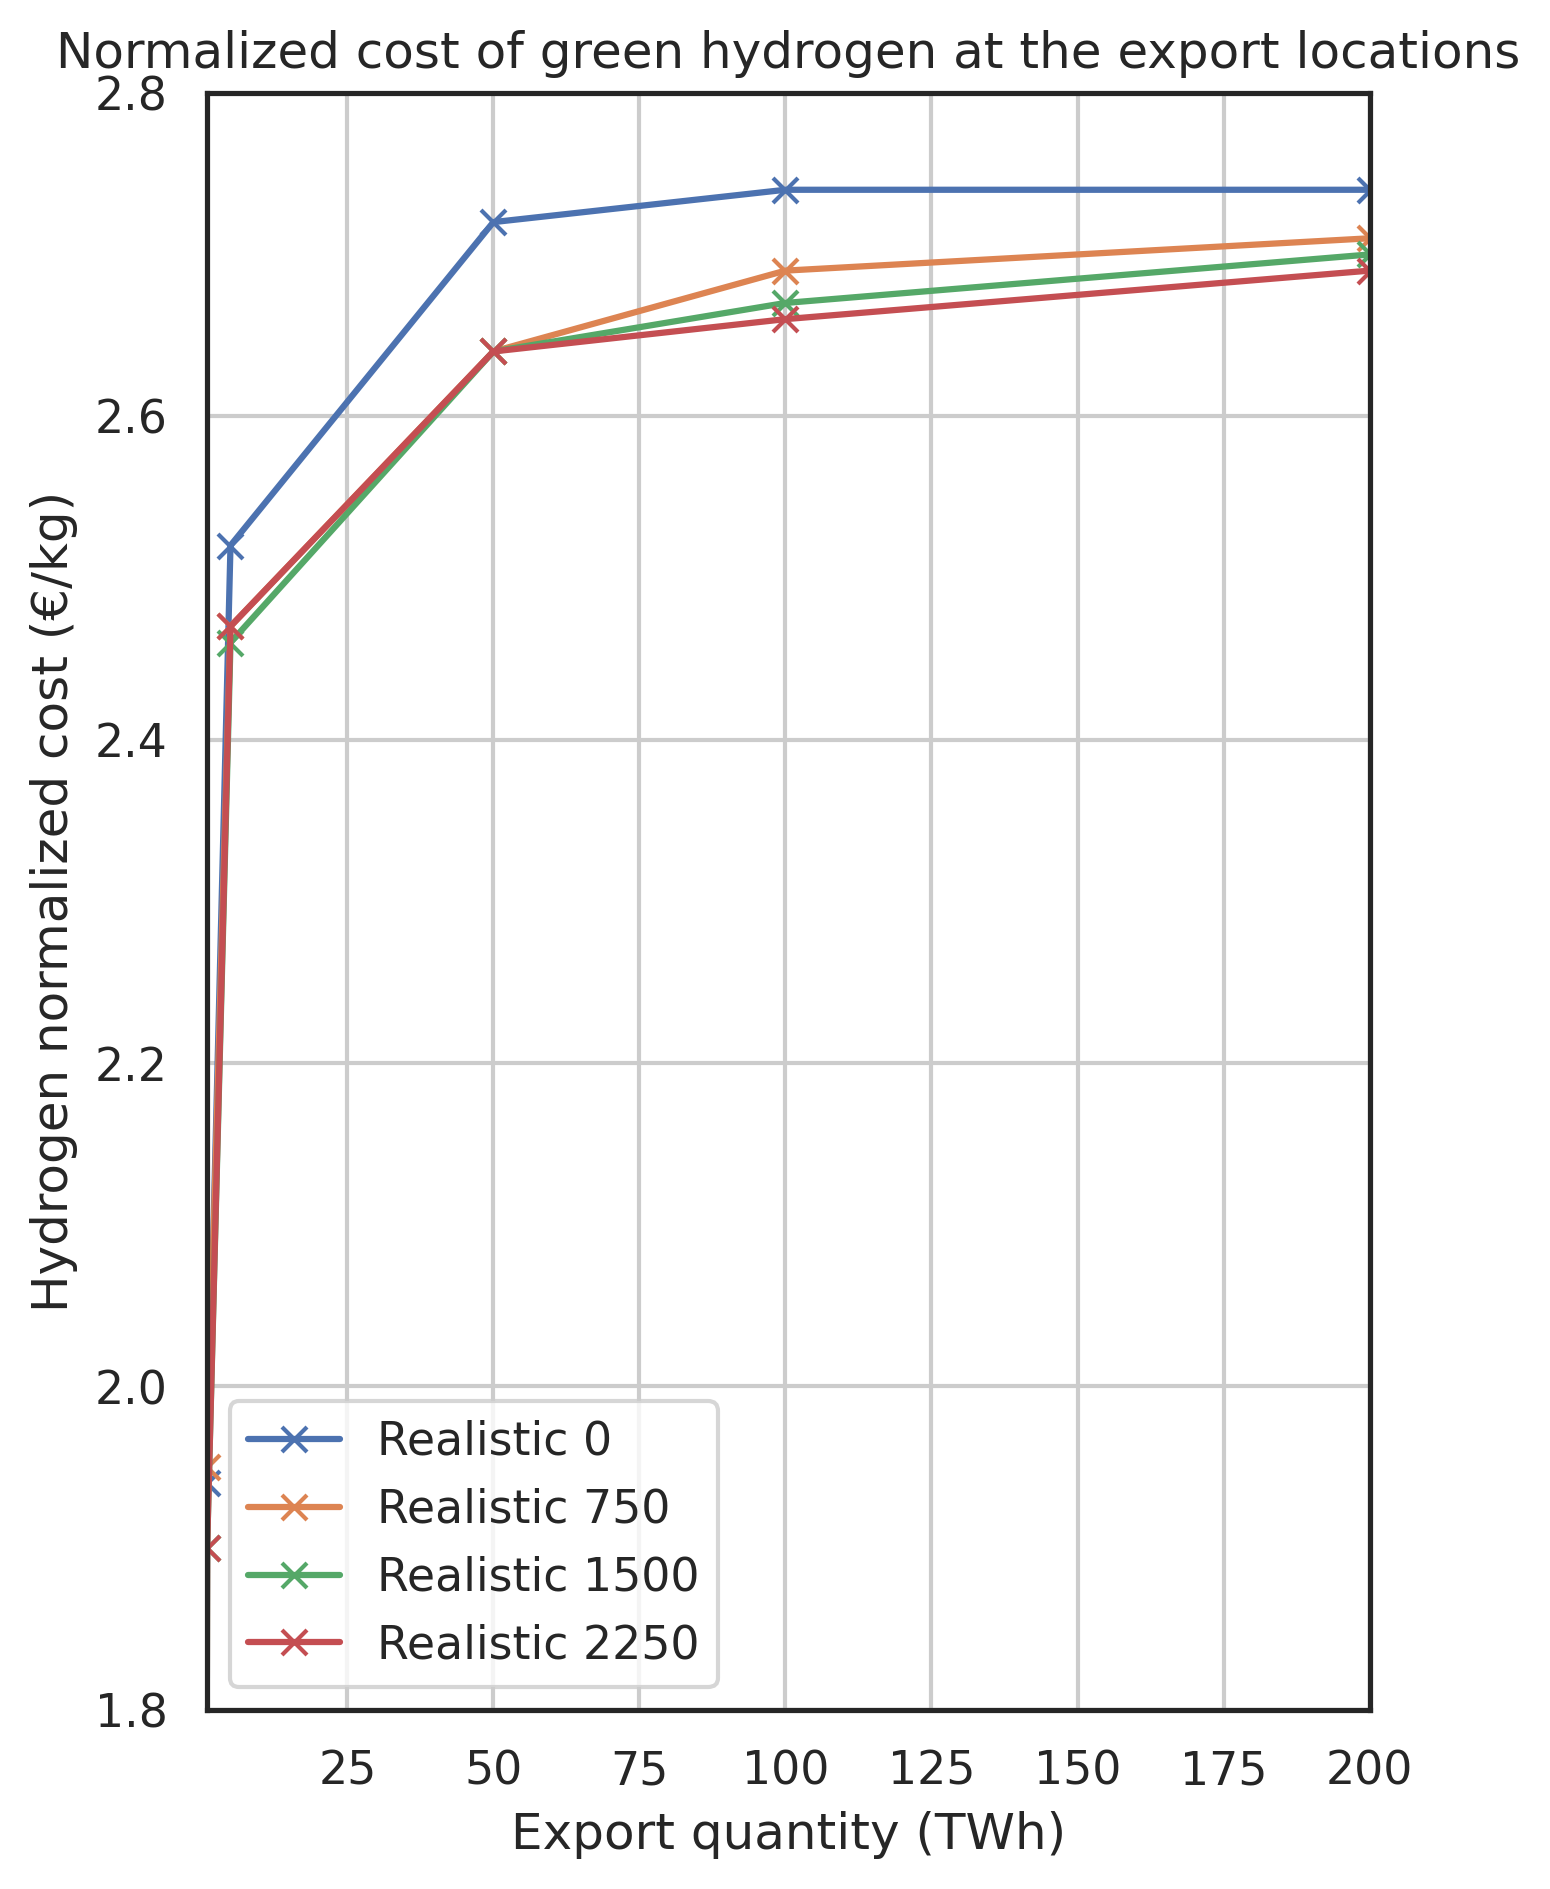

,30,30.1,30.2,30.3,30.4,30.5
Realistic 0 (total system cost [€]),1.113614e+09,1.171761e+09,1.491652e+09,5.200204e+09,9.324425e+09,1.757357e+10
Realistic 0 Hydrogen normalized cost [€/kg],0.000000e+00,1.940000e+00,2.520000e+00,2.720000e+00,2.740000e+00,2.740000e+00
Realistic 750 (total system cost [€]),1.105215e+09,1.163663e+09,1.475080e+09,5.073050e+09,9.163630e+09,1.737639e+10
Realistic 750 Hydrogen normalized cost [€/kg],0.000000e+00,1.950000e+00,2.470000e+00,2.640000e+00,2.690000e+00,2.710000e+00
Realistic 1500 (total system cost [€]),1.105215e+09,1.162169e+09,1.474268e+09,5.066260e+09,9.107547e+09,1.728544e+10
Realistic 1500 Hydrogen normalized cost [€/kg],0.000000e+00,1.900000e+00,2.460000e+00,2.640000e+00,2.670000e+00,2.700000e+00
Realistic 2250 (total system cost [€]),1.105131e+09,1.162175e+09,1.475435e+09,5.064802e+09,9.092232e+09,1.724450e+10
Realistic 2250 Hydrogen normalized cost [€/kg],0.000000e+00,1.900000e+00,2.470000e+00,2.640000e+00,2.660000e+00,2.690000e+00


In [8]:
# create figure and axis
def plot_norm_cost_h2(scen_dict,pes_dir, type="line", xlim_1=1, xlim_2=200, ylim_1=1.8, ylim_2=2.8):
    import seaborn as sns
    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(5, 7))
    li = []
    dfm= pd.DataFrame()
    for pathway in scen_dict.keys():
        scenario = scen_dict[pathway]
        metrics_opt30 = pes_dir+"/results/{}/csvs/metrics.csv".format(scenario["run"])
        df = pd.read_csv(metrics_opt30, keep_default_na=False,
                na_values=[""])
        df=df.set_index('cluster')
        df = df.loc[['export', 'total costs']]
        df = df.apply(pd.to_numeric)
        #df.columns = ["0","1","5","50", "100", "200"]
        #print(df)
        dfc = [0]
        for column in df.columns[1:]:
            dfc.append(((df.loc["total costs",column].astype(float)- df.loc["total costs", "{}".format(scenario["cluster"])].astype(float)) / (df.loc["export", column] * (1e+09/33.33))).round(2))
        dfc = pd.DataFrame(dfc).transpose()
        dfc.columns = ["{}".format(scenario["cluster"]), "{}.1".format(scenario["cluster"]), "{}.2".format(scenario["cluster"]), "{}.3".format(scenario["cluster"]), "{}.4".format(scenario["cluster"]), "{}.5".format(scenario["cluster"])]
        
        dfopt = pd.concat([df, dfc], axis=0)
        #dfopt=dfopt.drop("30", axis=1)
        dfopt.T.plot(kind=type, ax=ax, x='export', y=0, grid=True, marker="x")
        dfopt = dfopt.drop("export")
        dfopt.index =["{} (total system cost [€])".format(pathway), "{} Hydrogen normalized cost [€/kg]".format(pathway)]
        dfm=pd.concat([dfm, dfopt])
        li.append(pathway)
        out = pd.DataFrame(dfopt)
    ax.legend(li);
    #print(li)
    #ax.legend(["Realistic 2030", "Conservative 2030"]);
    ax.set_ylabel('Hydrogen normalized cost (€/kg)',fontsize=12)
    ax.set_xlabel('Export quantity (TWh)',fontsize=12)
    ax.set_xlim(xlim_1,xlim_2)
    ax.set_ylim(ylim_1,ylim_2)
    ax.set_title('Normalized cost of green hydrogen at the export locations')
    plt.show()
    return dfm

plot_norm_cost_h2(scen_dict,pes_dir )

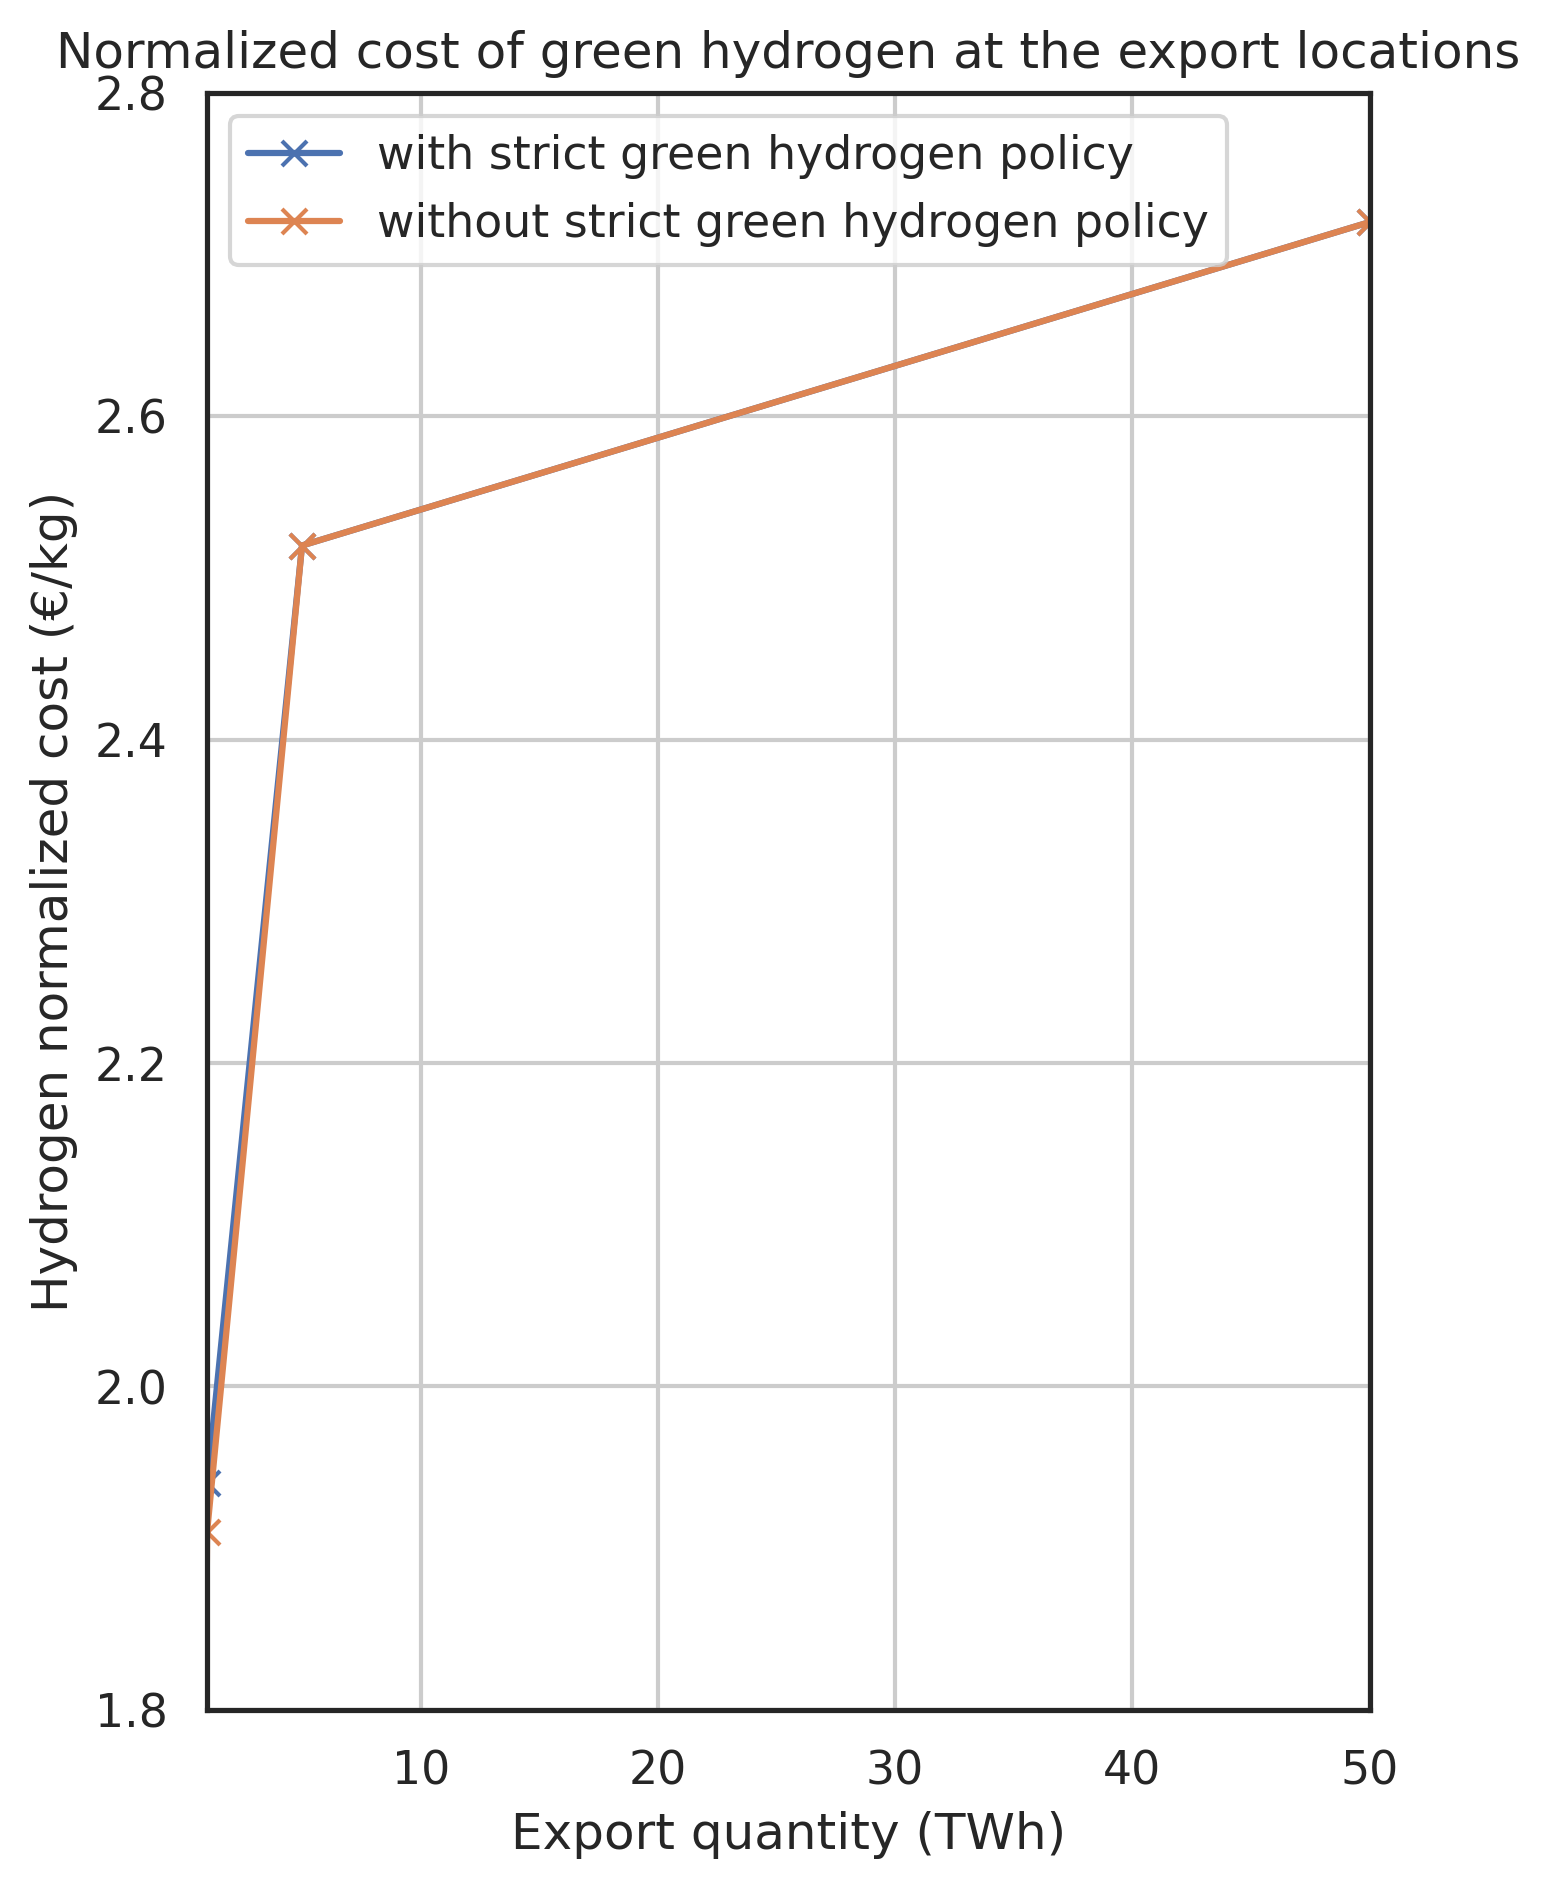

,30,30.1,30.2,30.3,30.4,30.5
with strict green hydrogen policy (total system cost [€]),1.113614e+09,1.171761e+09,1.491652e+09,5.200204e+09,9.324425e+09,1.757357e+10
with strict green hydrogen policy Hydrogen normalized cost [€/kg],0.000000e+00,1.940000e+00,2.520000e+00,2.720000e+00,2.740000e+00,2.740000e+00
without strict green hydrogen policy (total system cost [€]),1.113676e+09,1.171055e+09,1.492242e+09,5.201043e+09,9.324489e+09,1.757604e+10
without strict green hydrogen policy Hydrogen normalized cost [€/kg],0.000000e+00,1.910000e+00,2.520000e+00,2.720000e+00,2.740000e+00,2.740000e+00


In [9]:
scen_dict_mm = {'with strict green hydrogen policy':{
                      'run': 'MT_real30', 'cluster': '30', 'ir': '0.082', 'ds':'AP', 'l':'0'
                  },
              'without strict green hydrogen policy':{
                      'run': 'MT_real30_nores', 'cluster': '30', 'ir': '0.082', 'ds':'AP', 'l':'750'
              }
}

plot_norm_cost_h2(scen_dict_mm,pes_dir, "line", 1, 50, 1.8, 2.8)


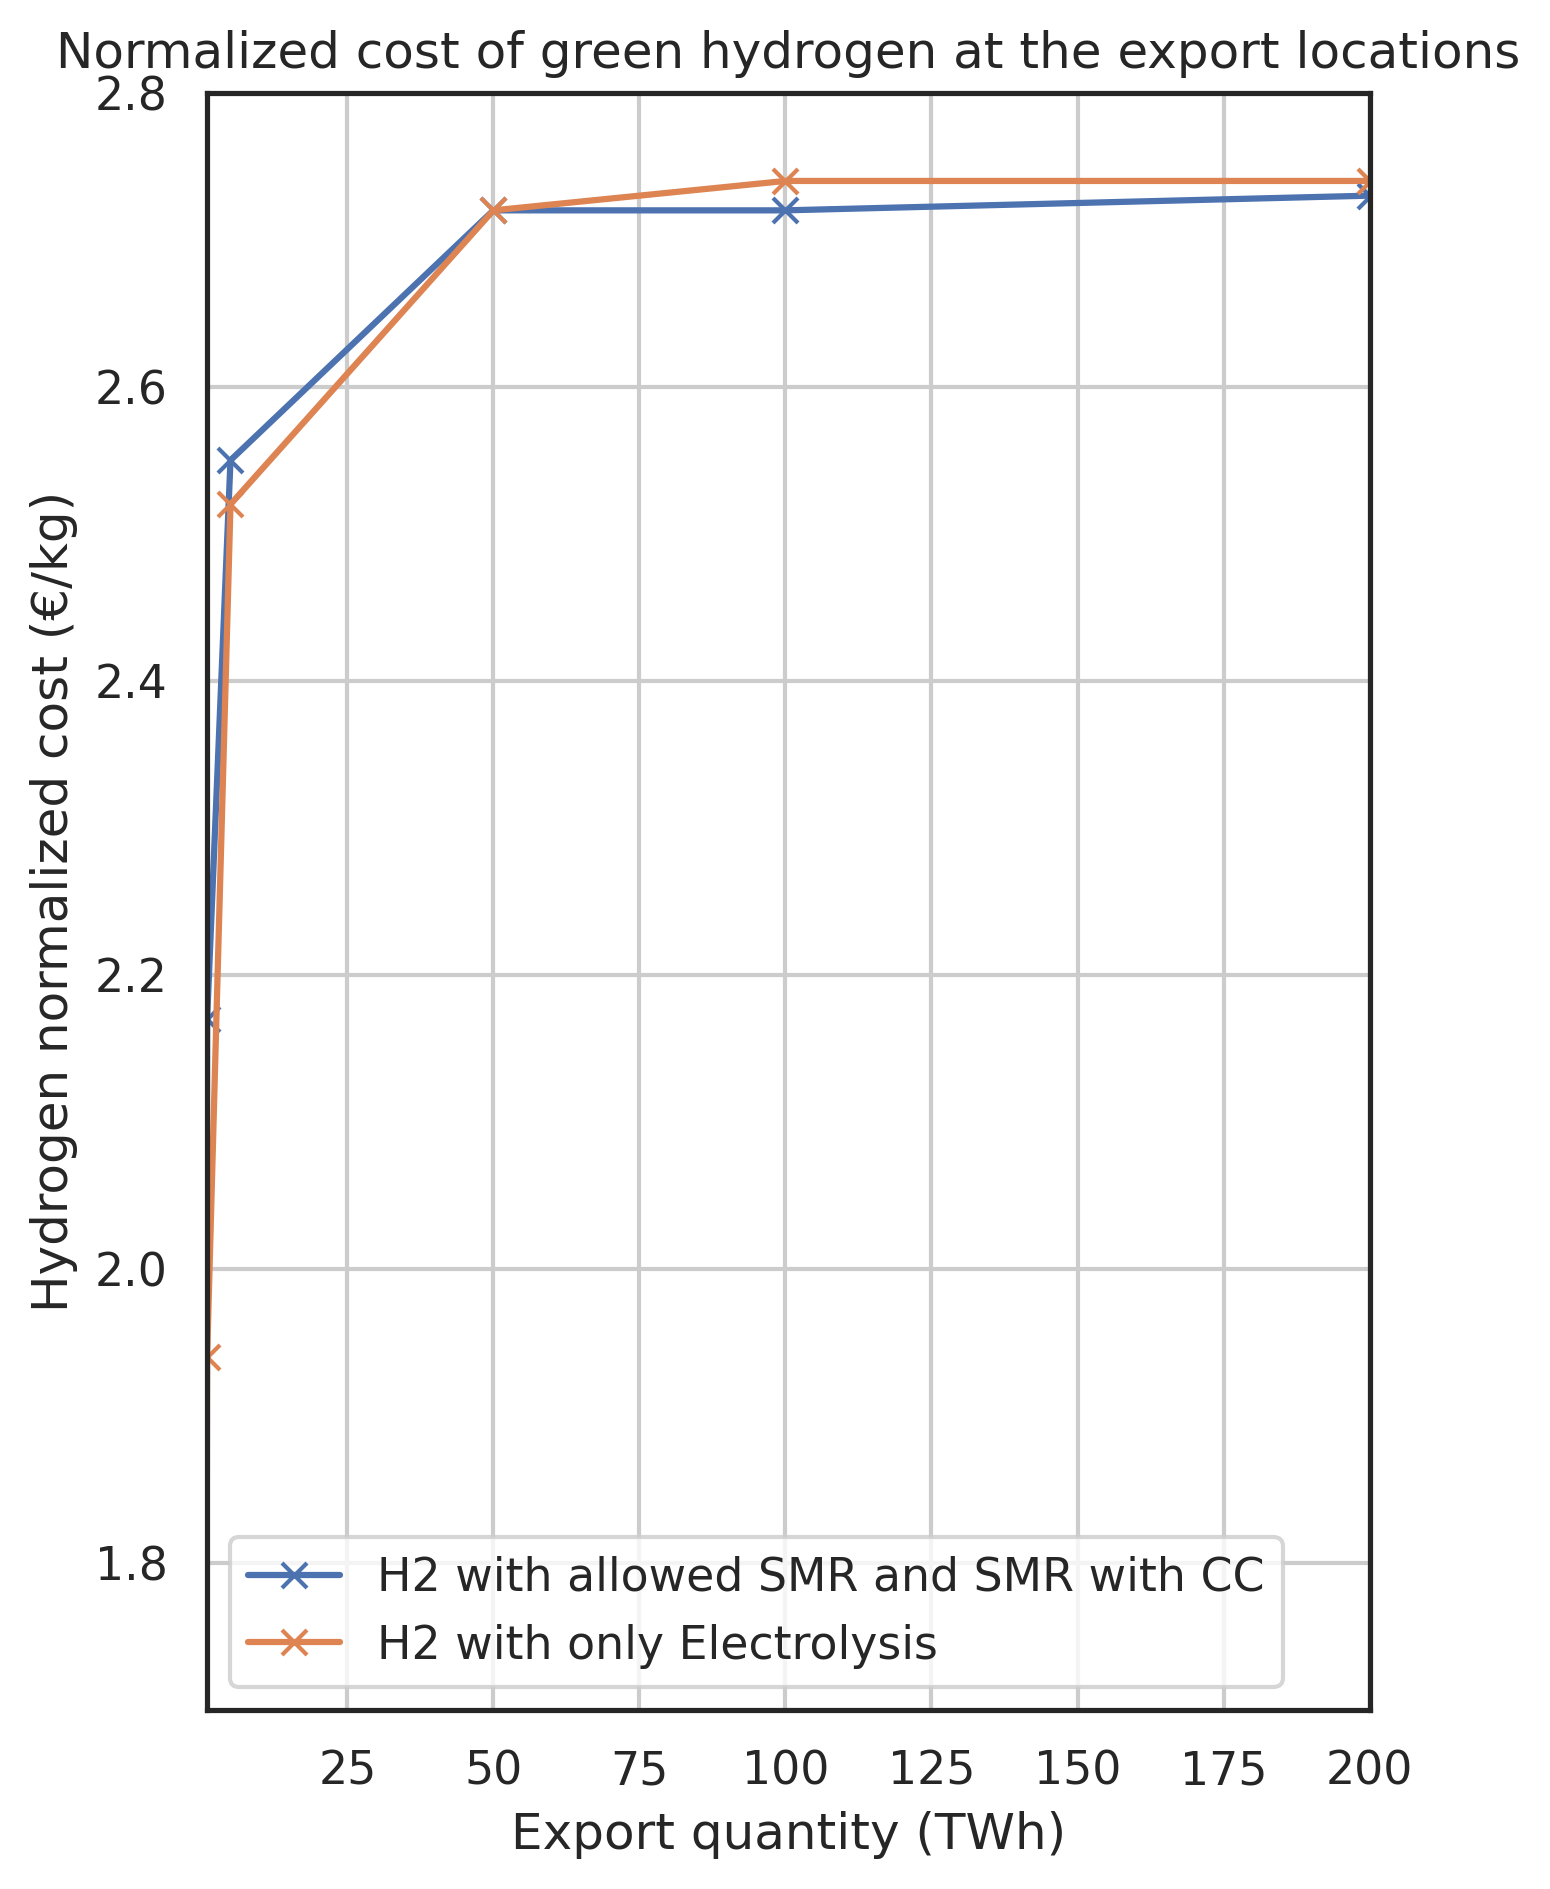

,30,30.1,30.2,30.3,30.4,30.5
H2 with allowed SMR and SMR with CC (total system cost [€]),1.099153e+09,1.164232e+09,1.481080e+09,5.172592e+09,9.274294e+09,1.747671e+10
H2 with allowed SMR and SMR with CC Hydrogen normalized cost [€/kg],0.000000e+00,2.170000e+00,2.550000e+00,2.720000e+00,2.720000e+00,2.730000e+00
H2 with only Electrolysis (total system cost [€]),1.113614e+09,1.171761e+09,1.491652e+09,5.200204e+09,9.324425e+09,1.757357e+10
H2 with only Electrolysis Hydrogen normalized cost [€/kg],0.000000e+00,1.940000e+00,2.520000e+00,2.720000e+00,2.740000e+00,2.740000e+00


In [10]:
scen_dict_smm = {'H2 with allowed SMR and SMR with CC':{
                      'run': 'MT_real30_nores_SMR', 'cluster': '30', 'ir': '0.082', 'ds':'AP', 'l':'0'
                  },
              'H2 with only Electrolysis':{
                      'run': 'MT_real30', 'cluster': '30', 'ir': '0.082', 'ds':'AP', 'l':'750'
              }
}
plot_norm_cost_h2(scen_dict_smm,pes_dir, "line", 1, 200, 1.7, 2.8)

KeyError: "None of [Index(['total costs'], dtype='object')] are in the [columns]"

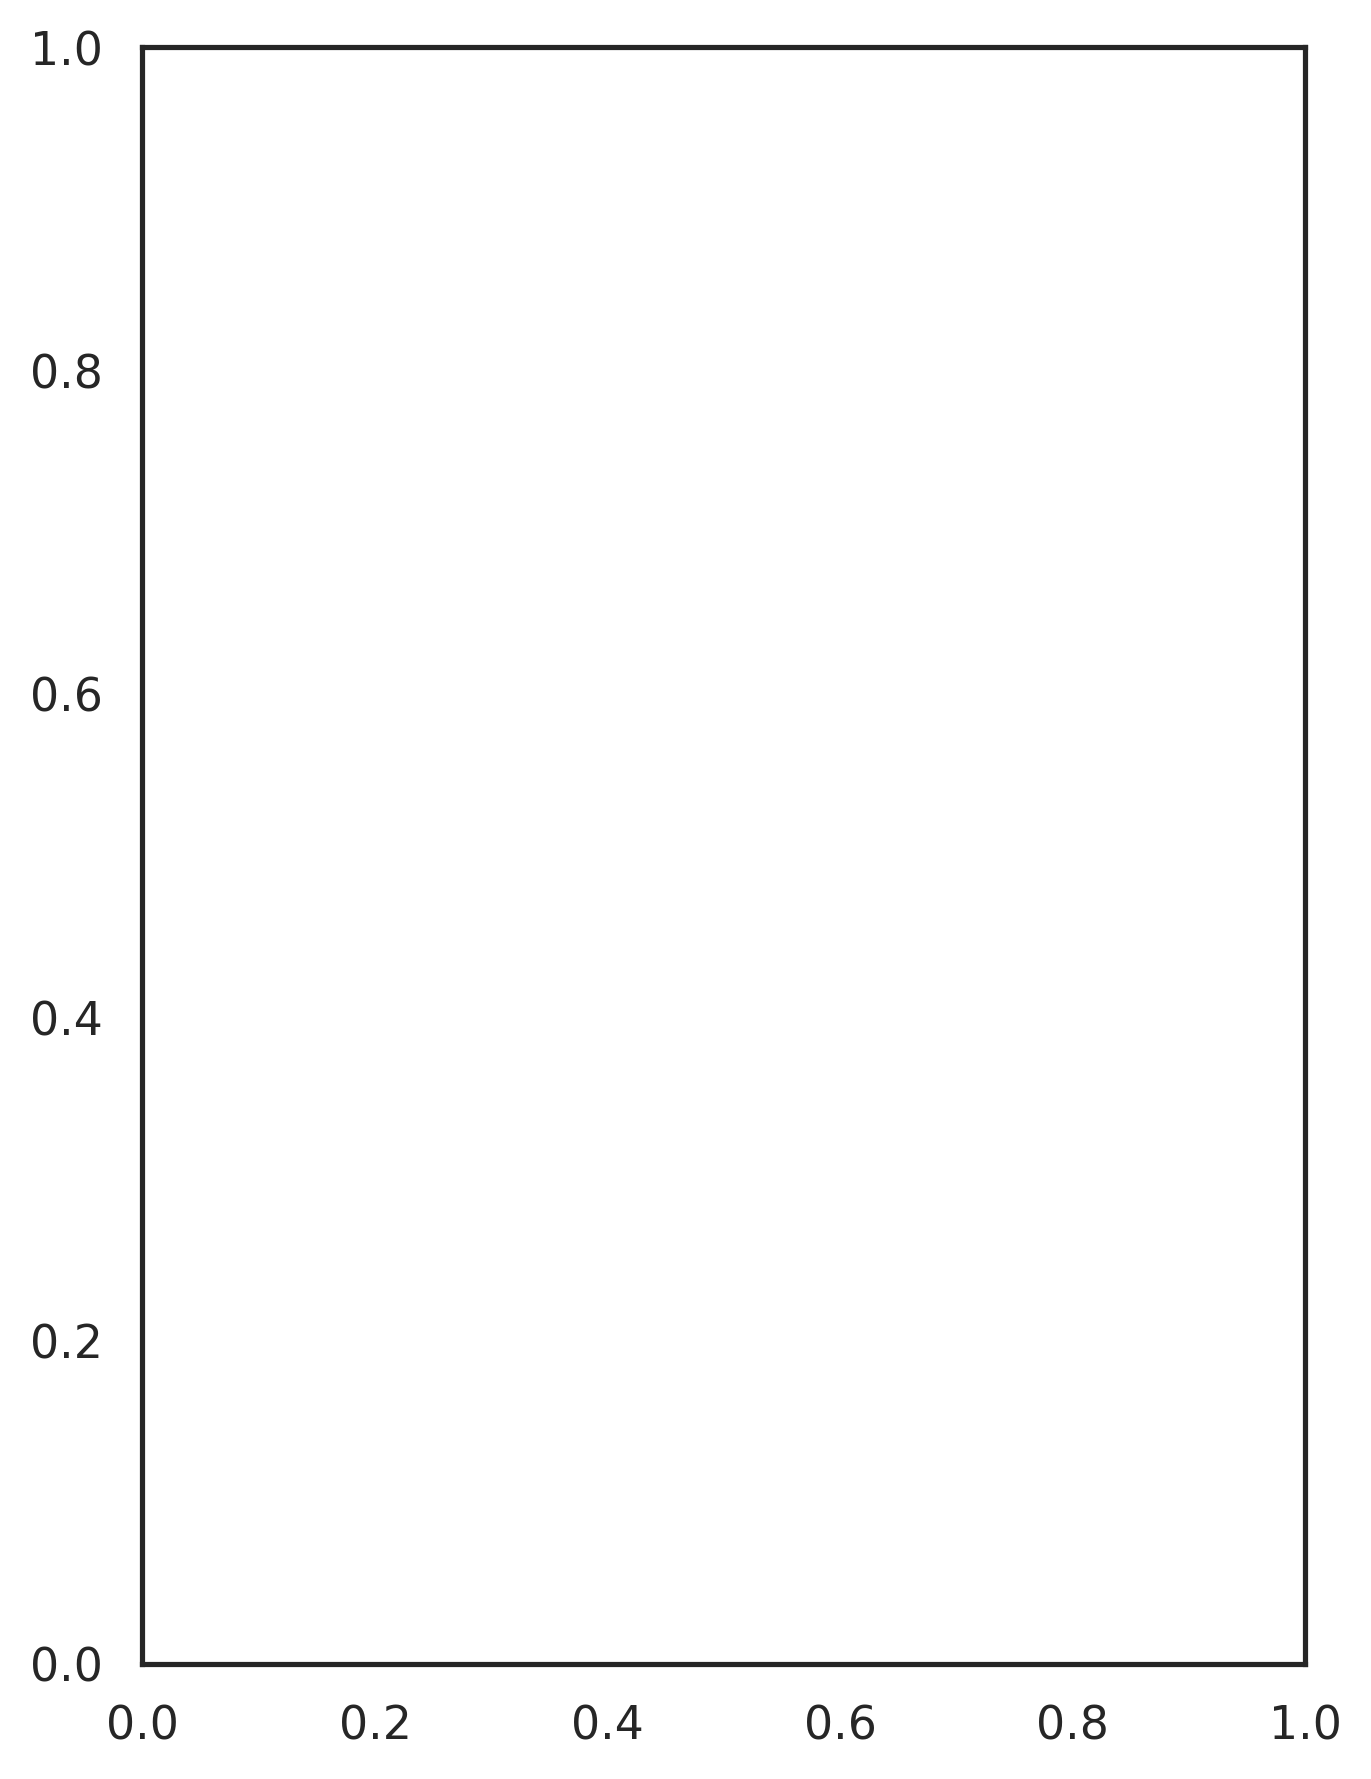

In [38]:
# create figure and axis
def plot_smr_cost(scen_dict,pes_dir, type="line", xlim_1=1, xlim_2=200, ylim_1=1.8, ylim_2=2.8):
    import seaborn as sns
    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(5, 7))
    li = []
    dfm= pd.DataFrame()
    for pathway in scen_dict.keys():
        scenario = scen_dict[pathway]
        metrics_opt30 = pes_dir+"/results/{}/csvs/metrics.csv".format(scenario["run"])
        dfc = pd.read_csv(metrics_opt30, keep_default_na=False,
                na_values=[""])
        dfc=dfc.set_index('cluster')
        dfc = dfc.loc[['export', 'total costs']]
        dfc = dfc.rename(columns=df.iloc[0])
        dfc = dfc.apply(pd.to_numeric)
        dfc.loc["total costs"] = dfc.loc["total costs"]*1e-9
        #print(df)
        #dfc = [0]
        # for column in df.columns[1:]:
        #     dfc.append(((df.loc["total costs",column].astype(float)- df.loc["total costs", "{}".format(scenario["cluster"])].astype(float)) / (df.loc["export", column] * (1e+09/33.33))).round(2))
        #dfc = pd.DataFrame(dfc).transpose()
        #dfc.columns = ["{}".format(scenario["cluster"]), "{}.1".format(scenario["cluster"]), "{}.2".format(scenario["cluster"]), "{}.3".format(scenario["cluster"]), "{}.4".format(scenario["cluster"]), "{}.5".format(scenario["cluster"])]
        
        #dfopt = pd.concat([df, dfc], axis=0)
        #dfopt=dfopt.drop("30", axis=1)
        #dfopt.T.plot(kind=type, ax=ax, x='export', y=0, grid=True, marker="x")
        dfc = dfc.drop("export", axis=0)
        #dfc.index =["{} (total system cost [€])".format(pathway)]
        dfc.columns=["0", "1","5","50","100","200"]
        dfc.T.plot(kind=type, ax=ax, grid=True, marker="x")
        #dfm=pd.concat([dfm, dfc])
        #li.append(dfm)
        print(dfc)
        #df = df.drop("export")
        #dfoptout = pd.DataFrame(dfopt)
    # ax.legend(li);
    # #print(li)
    # #ax.legend(["Realistic 2030", "Conservative 2030"]);
    # ax.set_ylabel('System cost cost (€)',fontsize=12)
    # ax.set_xlabel('Export quantity (TWh)',fontsize=12)
    # ax.set_xlim(xlim_1,xlim_2)
    # ax.set_ylim(ylim_1,ylim_2)
    # ax.set_title('Normalized cost of green hydrogen at the export locations')
    # plt.show()
    # return dfm

plot_smr_cost(scen_dict_smm,pes_dir, "line", 1, 200, 1.7, 2.8)

,Electrolysis,SMR,SMR with CC
0,72.251355,27.693566,0.055080
1,86.088298,13.876316,0.035387
5,86.427541,13.531888,0.040571
50,90.371517,9.612954,0.015529
100,90.772392,9.218275,0.009333
200,90.949700,9.045788,0.004512


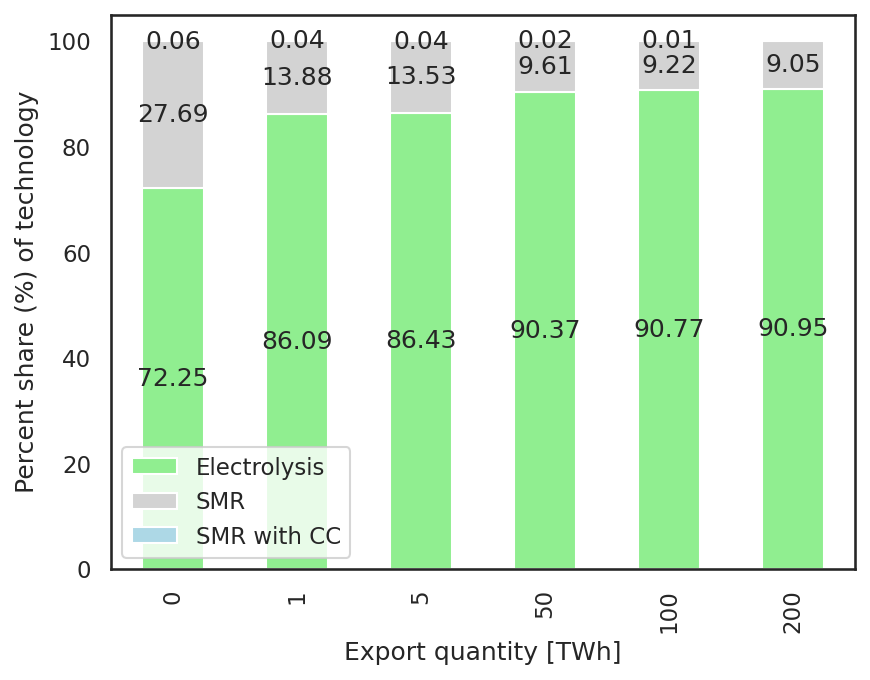

In [ ]:
import seaborn as sns
sns.set_style("white")

colors = ["lightgreen", "lightgrey", "lightblue"]
label = ['Electrolysis', 'SMR','SMR with CC']
sns.set_palette(sns.color_palette(colors))
dfc=pd.DataFrame()
for q in Q30:
    li = []
    n= pypsa.Network("/home/raj08555/dev/sandbox-cs/pypsa-earth-sec/results/MT_real30_nores_SMR/postnetworks/elec_s_30_ec_lc1.0_Co2L_3H_2030_0.082_AP_{}export.nc".format(q))
    elec = - n.links_t.p1.filter(regex="Electrolysis").sum().sum()*3/1e6
    smr = - n.links_t.p1.filter(regex="SMR$").sum().sum()*3/1e6
    smr_cc = - n.links_t.p1.filter(regex="SMR CC$").sum().sum()*3/1e6
    li.append((elec / (elec + smr + smr_cc))*1e2)
    li.append((smr / (elec + smr + smr_cc))*1e2)
    li.append((smr_cc / (elec + smr + smr_cc))*1e2)
    
    dftemp=pd.DataFrame(li)
    dftemp = dftemp.transpose()
    dftemp.index= [q]
    dfc = pd.concat([dfc, dftemp])
dfc.columns = ["Electrolysis", "SMR", "SMR with CC"]
ax = dfc.plot(kind="bar", stacked = True, xlabel= "Export quantity [TWh]", ylabel = "Percent share (%) of technology")
for c in ax.containers:
        # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height().round(2) if v.get_height().round(2) > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
dfc

In [ ]:
n= pypsa.Network("/home/raj08555/dev/sandbox-cs/pypsa-earth-sec/results/MT_real30_nores_SMR/postnetworks/elec_s_30_ec_lc1.0_Co2L_3H_2030_0.082_AP_0export.nc")
n.links_t.p1.filter(regex="Electrolysis").sum().sum()
# smr = - n.links_t.p1.sum().sum()/1e6
# smr
#n.stores_t.e.iloc[-1]

-322616.8898415475